<a href="https://colab.research.google.com/github/davidjonathan01/ComparacionModelosPredictivos_CompraBicicletas/blob/main/PrediccionCompraBicicletas_MetodlogiaSEMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: MUESTRA

**1.1 Cargue el conjunto de datos.**

Cargue el conjunto de datos. Comprueba su tama√±o. Eche un vistazo preliminar a los datos. Muestreo de los datos si es necesario. Dividirlo en conjuntos de entrenamiento y validaci√≥n.

*   1.1 Cargar el conjunto de datos Primero, descomprimamos el archivo proporcionado y carguemos el conjunto de datos.




In [ ]:
import pandas as pd
import numpy as np
data_input=pd.read_csv('Ejercicio_Aplicacion_SEMMA.csv')
data_input.head(3)

CustomerKey  GeographyKey CustomerAlternateKey Title FirstName MiddleName  \
0        11000            26           AW00011000   NaN       Jon          V   
1        11001            37           AW00011001   NaN    Eugene          L   
2        11002            31           AW00011002   NaN     Ruben        NaN   

  LastName  NameStyle  BirthDate  Age  ... FrenchOccupation HouseOwnerFlag  \
0     Yang          0  6/10/1986   38  ...            Cadre              1   
1    Huang          0  10/5/1991   33  ...            Cadre              0   
2   Torres          0   9/2/1986   39  ...            Cadre              1   

  NumberCarsOwned      AddressLine1  AddressLine2                Phone  \
0               0   3761 N. 14th St           NaN  1 (11) 500 555-0162   
1               1        2243 W St.           NaN  1 (11) 500 555-0110   
2               1  5844 Linden Land           NaN  1 (11) 500 555-0184   

   DateFirstPurchase CommuteDistance   Region BikeBuyer  
0          19/1/2011       1-2 Miles  Pacific         1  
1          15/1/2011       0-1 Miles  Pacific         1  
2           7/1/2011       2-5 Miles  Pacific         1  

[3 rows x 32 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   CustomerKey : ID √∫nico del cliente dentro del sistema (clave primaria).
*   GeographyKey : ID de la regi√≥n geogr√°fica del cliente (relacionado a otra tabla de regiones).
*   CustomerAlternateKey : 	Identificador alternativo del cliente (como un c√≥digo de cliente externo).
*   Title : T√≠tulo
*   FirstName : Nombre del cliente.
*   MiddleName : Segundo nombre.
*   LastName : Apellido del cliente.
*   NameStyle : Estilo del nombre: 0 (occidental), 1 (oriental o alternativo).
*   BirthDate	: Fecha de nacimiento del cliente
*   MaritalStatus : Estado civil: S (soltero), M (casado).
*   Suffix : Sufijo del nombre (Jr., Sr., III, etc.).
*   Gender : G√©nero del cliente (M o F).
*   EmailAddress : Correo electr√≥nico del cliente.
*   Phone : N√∫mero telef√≥nico.
*   AddressLine1 : Direcci√≥n principal del cliente.
*   AddressLine2 : Segunda l√≠nea de direcci√≥n (opcional).
*   YearlyIncome : ingreso anual del cliente.
*   EnglishOccupation : Ocupaci√≥n del cliente (en ingl√©s).
*   SpanishOccupation : Ocupaci√≥n del cliente (en espa√±ol).
*   FrenchOccupation : Ocupaci√≥n del cliente (en franc√©s).
*   EnglishEducation : Nivel educativo del cliente (en ingl√©s).
*   SpanishEducation : Nivel educativo (en espa√±ol).
*   FrenchEducation : Nivel educativo (en franc√©s).
*   HouseOwnerFlag : 1 si el cliente es due√±o de su casa, 0 si no.
*   NumberCarsOwned : N√∫mero de autos que posee el cliente.
*   TotalChildren : N√∫mero total de hijos.
*   NumberChildrenAtHome : Hijos que viven en el mismo hogar.
*   DateFirstPurchase : Fecha de la primera compra del cliente.
*   CommuteDistance : Distancia t√≠pica que recorre para ir al trabajo (categor√≠as como 0-1 Miles, 1-2 Miles, etc.).
*   Region : Regi√≥n geogr√°fica (ej. Pacific, Europe, etc.).
*   BikeBuyer : Variable objetivo: 1 si compr√≥ una bicicleta, 0 si no.




**1.2 Verificar el tama√±o del conjunto de datos# Nueva secci√≥n**

*   A continuaci√≥n, verifiquemos el tama√±o del conjunto de datos.

In [ ]:
num_rows, num_columns=data_input.shape
print(f"existen {num_rows} filas y {num_columns} columnas")

existen 18484 filas y 32 columnas


**1.3 Partici√≥n de datos**


* Para asegurarnos de tener un conjunto para validar nuestro modelo m√°s adelante, debemos dividir los datos en un conjunto de entrenamiento y un conjunto de validaci√≥n (o prueba). Una pr√°ctica com√∫n es asignar entre el 70% y el 80% de los datos para capacitaci√≥n y el resto para validaci√≥n. Para este an√°lisis, utilicemos una divisi√≥n 80-20.



In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80-20 split)
train_data, validation_data = train_test_split(data_input, test_size=0.2, random_state=42)

# Checking the size of the training and validation datasets
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]

train_size, validation_size

(14787, 3697)

*  Conjunto de entrenamiento: 14787 entradas Conjunto de validaci√≥n: 3697 entradas Una vez completado el paso "Muestra", pasaremos a la fase "Explorar", donde analizaremos la distribuci√≥n, las estad√≠sticas y las visualizaciones del conjunto de datos para comprender mejor su estructura y caracter√≠sticas.

# Paso 2: EXPLORAR



* Calcular estad√≠sticas resumidas. Visualice la distribuci√≥n de caracter√≠sticas clave. Compruebe si hay anomal√≠as en los datos, como valores faltantes y valores at√≠picos.

* 2.1 Estad√≠sticas resumidas



In [ ]:
# Computing summary statistics for the training data
summary_statistics = train_data.describe()

summary_statistics

CustomerKey  GeographyKey  NameStyle          Age   YearlyIncome  \
count   3168.000000   3168.000000     3167.0  3167.000000    3167.000000   
mean   12996.439394    262.640152        0.0    40.354594   58616.987686   
std     1140.063512    198.018412        0.0    11.469931   33111.645241   
min    11000.000000      2.000000        0.0    23.000000   10000.000000   
25%    12005.750000     65.000000        0.0    31.000000   30000.000000   
50%    12998.500000    243.000000        0.0    38.000000   60000.000000   
75%    13985.250000    348.000000        0.0    48.000000   80000.000000   
max    14960.000000    654.000000        0.0    92.000000  170000.000000   

       TotalChildren  NumberChildrenAtHome  HouseOwnerFlag  NumberCarsOwned  \
count    3167.000000           3167.000000     3167.000000      3167.000000   
mean        1.805178              1.034102        0.741711         1.449005   
std         1.619605              1.540188        0.437763         1.150889   
min         0.000000              0.000000        0.000000         0.000000   
25%         0.000000              0.000000        0.000000         1.000000   
50%         1.000000              0.000000        1.000000         1.000000   
75%         3.000000              2.000000        1.000000         2.000000   
max         5.000000              5.000000        1.000000         4.000000   

         BikeBuyer  
count  3167.000000  
mean      0.494159  
std       0.500045  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

* 2.2 Visualizaci√≥n
* A continuaci√≥n, visualizaremos la distribuci√≥n de caracter√≠sticas clave como edad, numero de autos, total de hijos, tabla

<ipython-input-6-d00a49d6b718>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['BirthDate'] = pd.to_datetime(train_data['BirthDate'], errors='coerce')


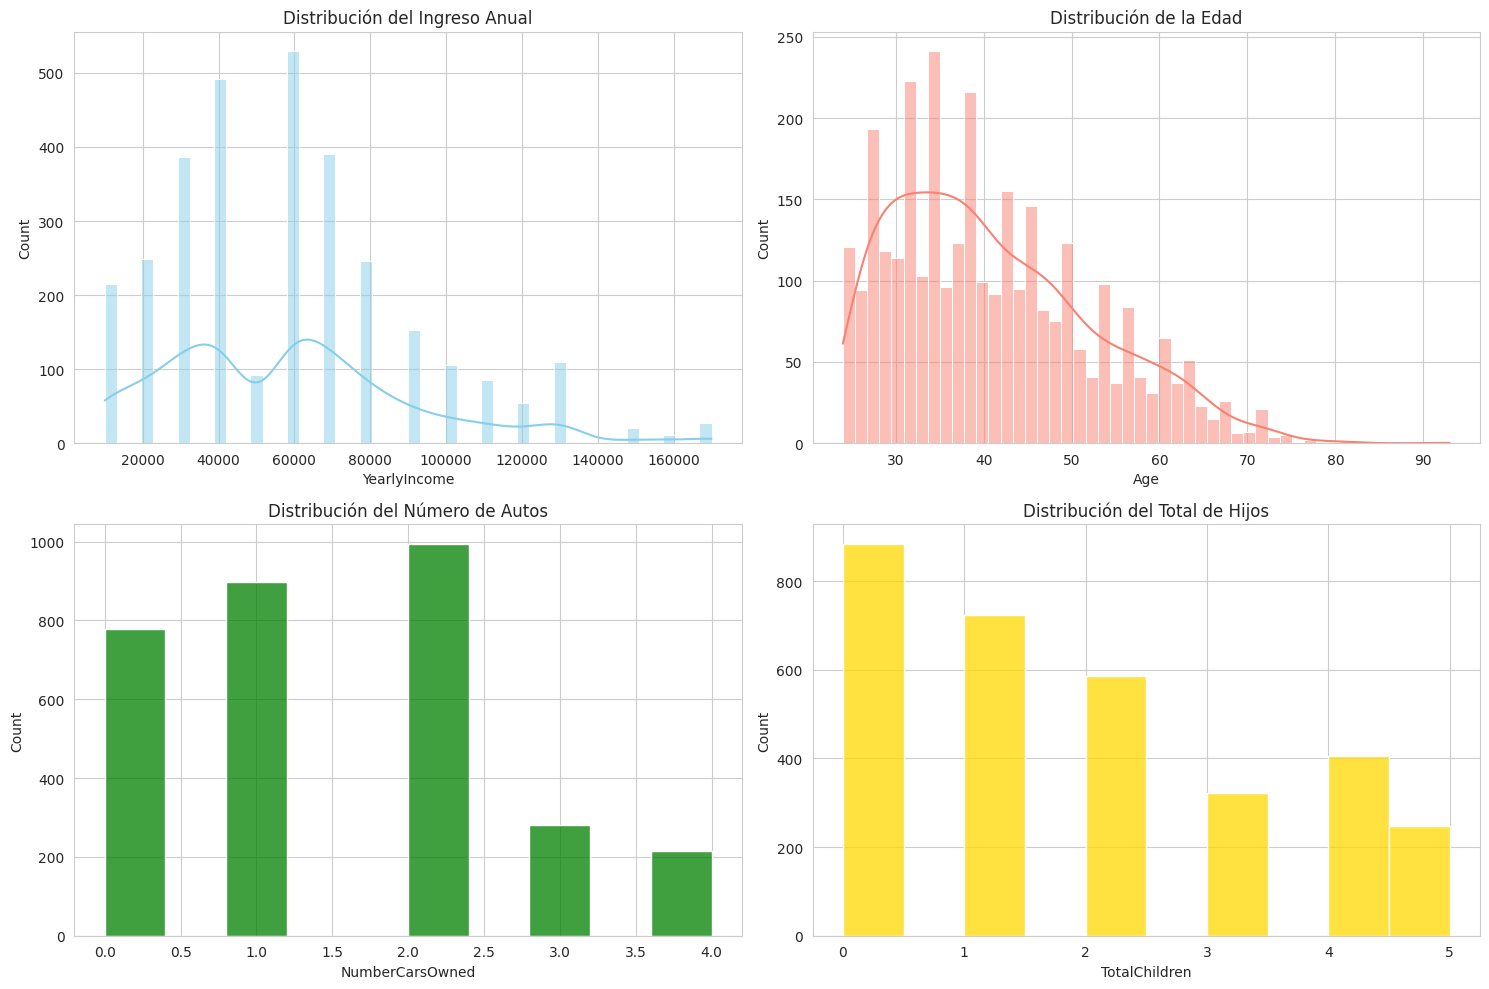

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


train_data['BirthDate'] = pd.to_datetime(train_data['BirthDate'], errors='coerce')
train_data['Age'] = 2025 - train_data['BirthDate'].dt.year


sns.set_style("whitegrid")


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(train_data['YearlyIncome'], bins=50, color='skyblue', kde=True)
plt.title('Distribuci√≥n del Ingreso Anual')


plt.subplot(2, 2, 2)
sns.histplot(train_data['Age'].dropna(), bins=50, color='salmon', kde=True)
plt.title('Distribuci√≥n de la Edad')


plt.subplot(2, 2, 3)
sns.histplot(train_data['NumberCarsOwned'], bins=10, color='green', kde=False)
plt.title('Distribuci√≥n del N√∫mero de Autos')


plt.subplot(2, 2, 4)
sns.histplot(train_data['TotalChildren'], bins=10, color='gold', kde=False)
plt.title('Distribuci√≥n del Total de Hijos')


plt.tight_layout()
plt.show()

üìä Distribuci√≥n del Ingreso Anual (YearlyIncome)
La mayor√≠a de los clientes tiene un ingreso anual entre 20,000 y 80,000, con un pico notable alrededor de 60,000. Tambi√©n se observa una menor concentraci√≥n de clientes con ingresos superiores a los $100,000, lo que sugiere la existencia de un grupo reducido de alto poder adquisitivo.

üëµ Distribuci√≥n de la Edad (Age)
La edad de los clientes se concentra mayormente entre los 25 y 45 a√±os, con un pico en torno a los 35 a√±os. La distribuci√≥n muestra una ca√≠da progresiva a partir de los 50 a√±os, indicando que la base de clientes est√° conformada principalmente por adultos j√≥venes y de mediana edad.

üöó Distribuci√≥n del N√∫mero de Autos (NumberCarsOwned)
La mayor√≠a de los clientes posee entre 0 y 2 autos, siendo m√°s com√∫n tener exactamente 2 autos. La cantidad de personas que posee m√°s de 2 veh√≠culos disminuye considerablemente, lo que sugiere que tener muchos autos no es lo habitual entre los clientes.

üë∂ Distribuci√≥n del Total de Hijos (TotalChildren)
Una gran parte de los clientes no tiene hijos, seguido por aquellos que tienen 1 o 2 hijos. La frecuencia disminuye conforme aumenta el n√∫mero de hijos, lo cual indica que la mayor√≠a de los hogares en la base de datos son peque√±os o sin hijos.

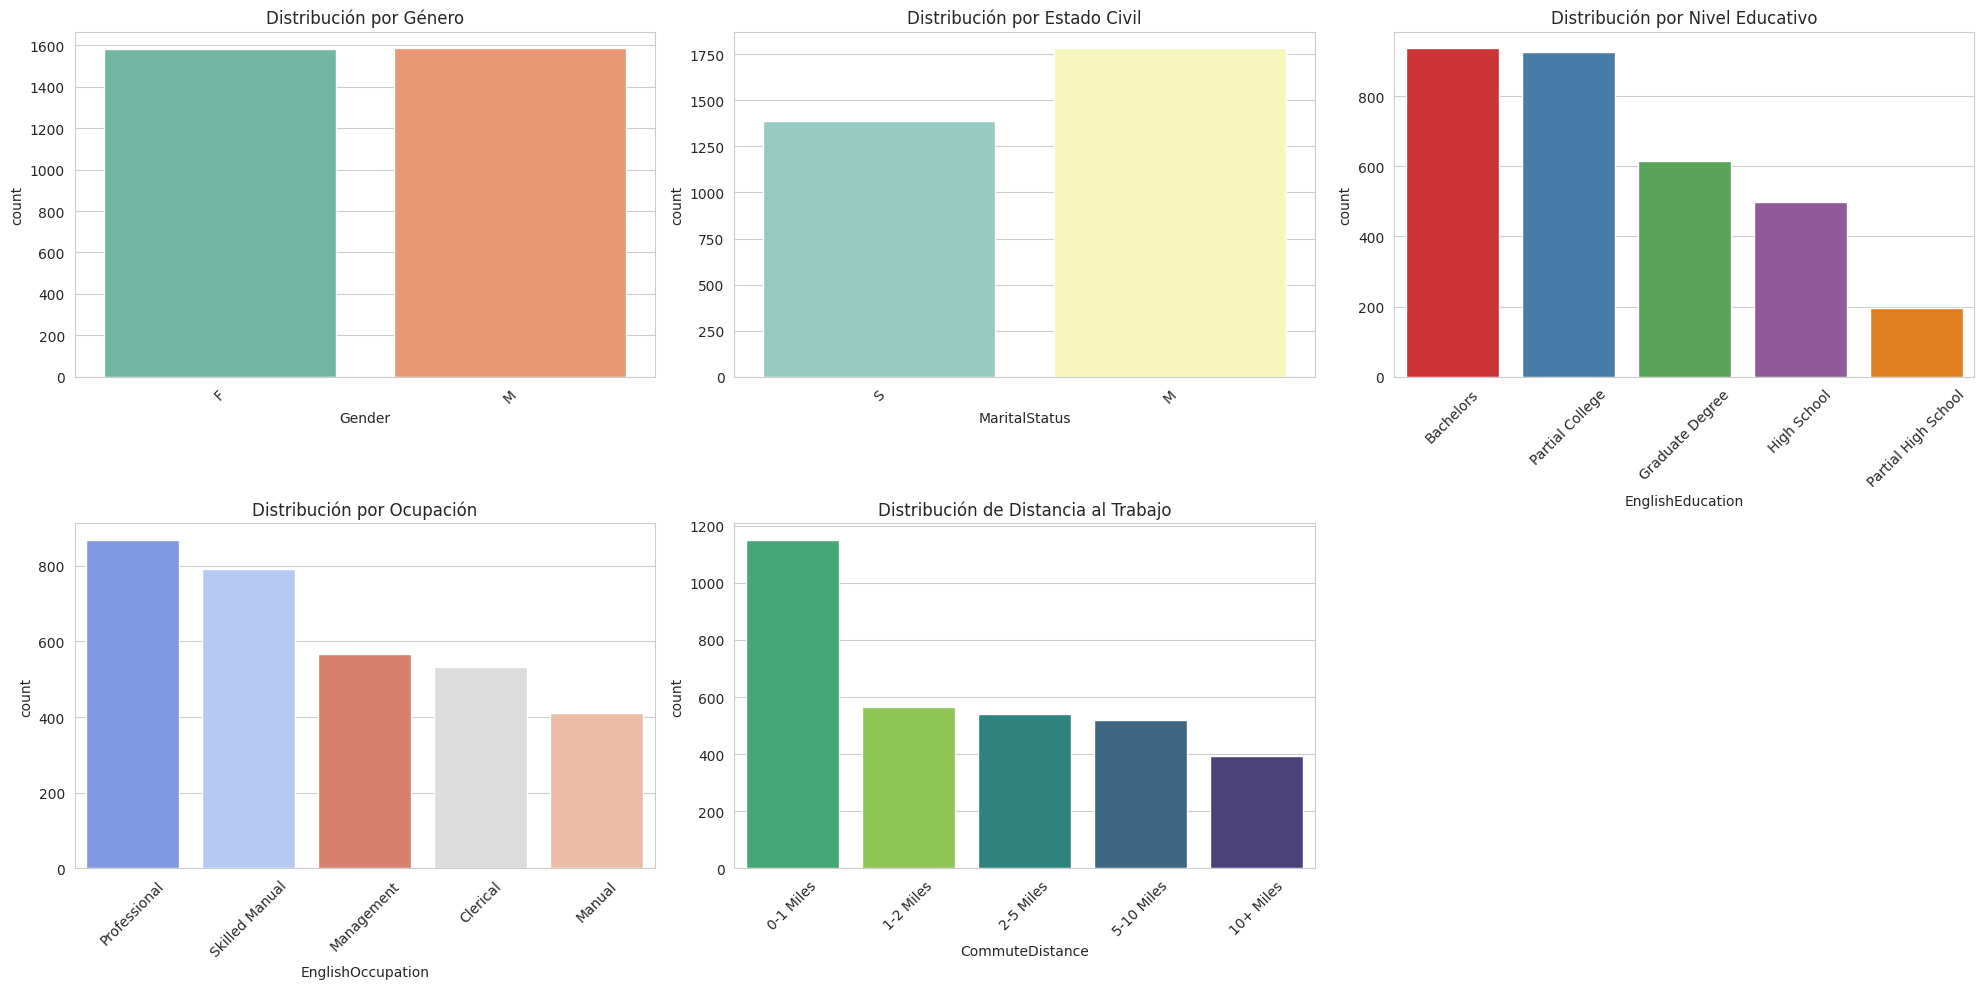

In [ ]:
plt.figure(figsize=(20, 10))

# G√©nero
plt.subplot(2, 3, 1)
sns.countplot(data=train_data, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Distribuci√≥n por G√©nero')
plt.xticks(rotation=45)

# Estado civil
plt.subplot(2, 3, 2)
sns.countplot(data=train_data, x='MaritalStatus', hue='MaritalStatus', palette='Set3', legend=False)
plt.title('Distribuci√≥n por Estado Civil')
plt.xticks(rotation=45)

# Educaci√≥n
plt.subplot(2, 3, 3)
edu_order = train_data['EnglishEducation'].value_counts().index
sns.countplot(data=train_data, x='EnglishEducation', hue='EnglishEducation', order=edu_order, palette='Set1', legend=False)
plt.title('Distribuci√≥n por Nivel Educativo')
plt.xticks(rotation=45)

# Ocupaci√≥n
plt.subplot(2, 3, 4)
occ_order = train_data['EnglishOccupation'].value_counts().index
sns.countplot(data=train_data, x='EnglishOccupation', hue='EnglishOccupation', order=occ_order, palette='coolwarm', legend=False)
plt.title('Distribuci√≥n por Ocupaci√≥n')
plt.xticks(rotation=45)

# Distancia al trabajo
plt.subplot(2, 3, 5)
commute_order = train_data['CommuteDistance'].value_counts().index
sns.countplot(data=train_data, x='CommuteDistance', hue='CommuteDistance', order=commute_order, palette='viridis', legend=False)
plt.title('Distribuci√≥n de Distancia al Trabajo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


G√©nero: La cantidad de hombres y mujeres es aproximadamente equilibrada, con una ligera mayor√≠a masculina.

Estado Civil: Predominan las personas casadas, seguidas por los solteros y divorciados.

Nivel Educativo (EnglishEducation): La mayor√≠a tiene un t√≠tulo universitario o alg√∫n t√≠tulo profesional, con pocos teniendo solo secundaria.

Ocupaci√≥n (EnglishOccupation): Las ocupaciones t√©cnicas y profesionales son las m√°s comunes.

Distancia al trabajo (CommuteDistance): Muchas personas viven a menos de 10 millas de su trabajo, aunque tambi√©n hay un n√∫mero considerable a m√°s de 10 millas.



*   2.3 Anomal√≠as de datos
*   A continuaci√≥n, debemos investigar posibles anomal√≠as, como:
*   Edades anormales



Estad√≠sticas descriptivas de Age:
count    3167.000000
mean       41.065993
std        11.484577
min        24.000000
25%        32.000000
50%        39.000000
75%        48.000000
max        93.000000
Name: Age, dtype: float64 

Estad√≠sticas descriptivas de HouseOwnerFlag:
count    3167.000000
mean        0.741711
std         0.437763
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HouseOwnerFlag, dtype: float64 

Valores √∫nicos en HouseOwnerFlag: [ 0.  1. nan] 

Estad√≠sticas descriptivas de BikeBuyer:
count    3167.000000
mean        0.494159
std         0.500045
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: BikeBuyer, dtype: float64 

Valores √∫nicos en BikeBuyer: [ 0.  1. nan] 



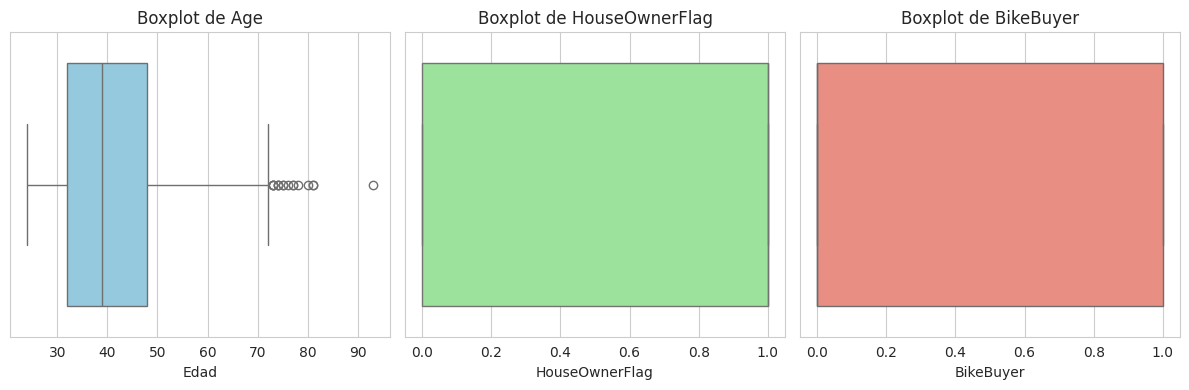

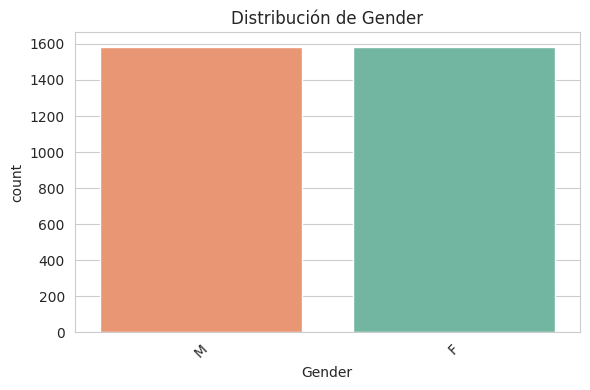

Conteo de categor√≠as en Gender:
Gender
M    1585
F    1582
Name: count, dtype: int64 



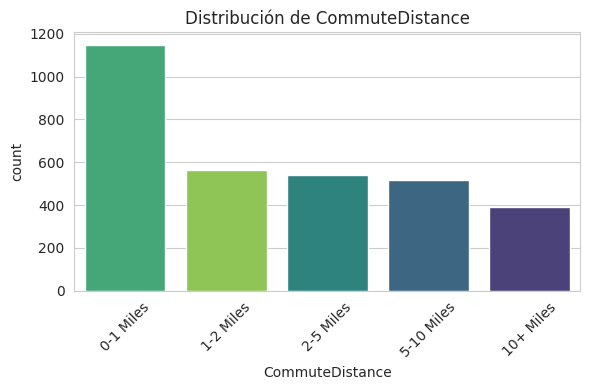

Conteo de categor√≠as en CommuteDistance:
CommuteDistance
0-1 Miles     1150
1-2 Miles      566
2-5 Miles      540
5-10 Miles     519
10+ Miles      392
Name: count, dtype: int64 



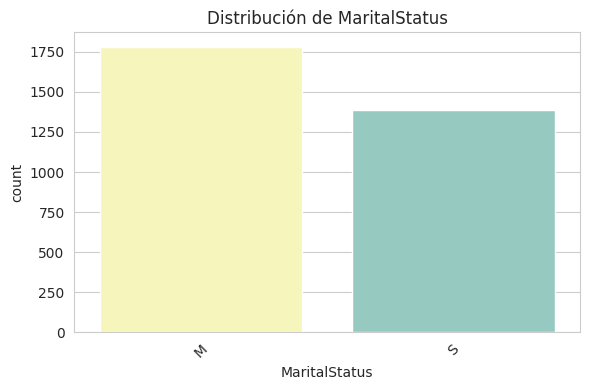

Conteo de categor√≠as en MaritalStatus:
MaritalStatus
M    1782
S    1385
Name: count, dtype: int64 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



train_data['BirthDate'] = pd.to_datetime(train_data['BirthDate'], errors='coerce')
train_data['Age'] = 2025 - train_data['BirthDate'].dt.year

# ---------------------------
# An√°lisis de columnas num√©ricas
# ---------------------------

# 1. Age: Boxplot y estad√≠sticas descriptivas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=train_data['Age'], color='skyblue')
plt.title('Boxplot de Age')
plt.xlabel('Edad')
plt.tight_layout()
print("Estad√≠sticas descriptivas de Age:")
print(train_data['Age'].describe(), "\n")

# 2. HouseOwnerFlag: Boxplot y estad√≠sticas descriptivas
plt.subplot(1, 3, 2)
sns.boxplot(x=train_data['HouseOwnerFlag'], color='lightgreen')
plt.title('Boxplot de HouseOwnerFlag')
plt.xlabel('HouseOwnerFlag')
plt.tight_layout()
print("Estad√≠sticas descriptivas de HouseOwnerFlag:")
print(train_data['HouseOwnerFlag'].describe(), "\n")
print("Valores √∫nicos en HouseOwnerFlag:", train_data['HouseOwnerFlag'].unique(), "\n")

# 3. BikeBuyer: Boxplot y estad√≠sticas descriptivas
plt.subplot(1, 3, 3)
sns.boxplot(x=train_data['BikeBuyer'], color='salmon')
plt.title('Boxplot de BikeBuyer')
plt.xlabel('BikeBuyer')
plt.tight_layout()
print("Estad√≠sticas descriptivas de BikeBuyer:")
print(train_data['BikeBuyer'].describe(), "\n")
print("Valores √∫nicos en BikeBuyer:", train_data['BikeBuyer'].unique(), "\n")

plt.show()

# ---------------------------
# An√°lisis de columnas categ√≥ricas
# ---------------------------

# Funci√≥n para graficar y mostrar los conteos
def plot_categorical(column, palette, title):
    plt.figure(figsize=(6,4))
    order = train_data[column].value_counts().index
    sns.countplot(data=train_data, x=column, order=order, palette=palette, hue=column, legend=False)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Conteo de categor√≠as en {column}:")
    print(train_data[column].value_counts(), "\n")

# 4. Gender
plot_categorical('Gender', palette='Set2', title='Distribuci√≥n de Gender')

# 5. CommuteDistance
plot_categorical('CommuteDistance', palette='viridis', title='Distribuci√≥n de CommuteDistance')

# 6. MaritalStatus
plot_categorical('MaritalStatus', palette='Set3', title='Distribuci√≥n de MaritalStatus')




*   No se encuentran anomalias en los valores encontrados, se busco si existian valores diferentes a 0 o 1 en los campos de decisi√≥n



In [ ]:

valores_faltantes = train_data.isnull().sum()

valores_faltantes

CustomerKey                0
GeographyKey               0
CustomerAlternateKey       0
Title                   3154
FirstName                  0
MiddleName              1322
LastName                   1
NameStyle                  1
BirthDate                  1
Age                        1
MaritalStatus              1
Suffix                  3168
Gender                     1
EmailAddress               1
YearlyIncome               1
TotalChildren              1
NumberChildrenAtHome       1
EnglishEducation           1
SpanishEducation           1
FrenchEducation            1
EnglishOccupation          1
SpanishOccupation          1
FrenchOccupation           1
HouseOwnerFlag             1
NumberCarsOwned            1
AddressLine1               1
AddressLine2            3113
Phone                      1
DateFirstPurchase          1
CommuteDistance            1
Region                     1
BikeBuyer                  1
dtype: int64



*   Para resumir nuestra exploraci√≥n:
*   Hemos analizado las distribuciones de caracter√≠sticas clave y los patrones observados. Identificamos valores nulos en algunas columnas. La siguiente fase del proceso SEMMA es "Modificar". En este paso, abordaremos estas casuisticas en los datos que hemos identificado, realizaremos una limpieza de datos.


# Paso 3: MODIFICAR



*   En esta fase, abordaremos las anomal√≠as de los datos y los prepararemos para el modelado. Espec√≠ficamente, haremos:


*   Maneje de las columnas y filas con valores nulos encontrados y selecci√≥n de columnas finales


*   Comencemos reemplazando los valores cero.




In [ ]:
#Columnas con valores nulos

data_input.drop(
    columns={"AddressLine2","Suffix","MiddleName","Title"} ,inplace=True
)

In [ ]:
#Columnas que no aportan valor significativo

data_input.drop(
    columns={'CustomerKey','CustomerAlternateKey','LastName', 'NameStyle'
             ,'EmailAddress','Phone','AddressLine1','DateFirstPurchase','FirstName','BirthDate'} ,inplace=True
)



In [ ]:
#Borrramos columas como idiomas que repiten datos pero en otro idioma y nos quedamos con el de espa√±ol
data_input.drop(
    columns={'EnglishEducation','FrenchEducation', 'EnglishOccupation','FrenchOccupation'} ,inplace=True
)

In [ ]:
data_input.columns

Index(['GeographyKey', 'Age', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'SpanishEducation',
       'SpanishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'CommuteDistance', 'Region', 'BikeBuyer'],
      dtype='object')

In [ ]:

data_input.head(3)

GeographyKey   Age MaritalStatus Gender  YearlyIncome  TotalChildren  \
0            26  38.0             M      M       90000.0            2.0   
1            37  33.0             S      M       60000.0            3.0   
2            31  39.0             M      M       60000.0            3.0   

   NumberChildrenAtHome SpanishEducation SpanishOccupation  HouseOwnerFlag  \
0                   0.0     Licenciatura       Profesional             1.0   
1                   3.0     Licenciatura       Profesional             0.0   
2                   3.0     Licenciatura       Profesional             1.0   

   NumberCarsOwned CommuteDistance   Region  BikeBuyer  
0              0.0       1-2 Miles  Pacific        1.0  
1              1.0       0-1 Miles  Pacific        1.0  
2              1.0       2-5 Miles  Pacific        1.0


*   En base al analisis realizado anteriormente, extrapolando a este dataframe tenemos que enfocarnos en la columna age. Haremos uso de la mediana agrupando por genero y ocupaci√≥n para completar estos valores faltantes.




In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Convertir la columna 'MaritalStatus' a 0 y 1 (# Ahora, 'M' ser√° 0 y 'S' ser√° 1)
data_input['MaritalStatus'] = label_encoder.fit_transform(data_input['MaritalStatus'])

# Convertir la columna 'Gender' a 0 y 1 (# Ahora, 'M' ser√° 1 y 'F' ser√° 0)
label_encoder2 = LabelEncoder()

data_input['Gender'] = label_encoder.fit_transform(data_input['Gender'])


#Variables dummies para estas 3 columnas
model= OneHotEncoder()
dummie= model.fit_transform(data_input[['SpanishEducation','SpanishOccupation','Region']]).toarray()

df_dummie= pd.DataFrame(dummie,columns=model.get_feature_names_out(['SpanishEducation','SpanishOccupation','Region']))

df_consolidado= pd.concat([data_input,df_dummie], axis=1)
#Eliminamos las columnas que dieron origen a las variables dummines porque ya no es necesario tenerlas
df_consolidado.drop(
    columns={'SpanishEducation','SpanishOccupation','Region'} ,inplace=True
)


# Reemplazar los valores en la columna 'CommuteDistance' con los n√∫meros promedios de sus rangos
df_consolidado['CommuteDistance'] = df_consolidado['CommuteDistance'].replace({
    '0-1 Miles': 0.5,
    '1-2 Miles': 1.5,
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 12.5
})
#Columnas pendiente para borrar
df_consolidado.drop(columns=['GeographyKey'],inplace=True)

df_consolidado.to_csv('Ejercicio_Aplicacion_SEMMA_preprocesado.csv', index=False)




<ipython-input-15-d44ff10604c2>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_consolidado['CommuteDistance'] = df_consolidado['CommuteDistance'].replace({


In [ ]:
df_consolidado

MaritalStatus  Gender  ...  Region_North America  Region_Pacific
0                  0       1  ...                   0.0             1.0
1                  1       1  ...                   0.0             1.0
2                  0       1  ...                   0.0             1.0
3                  1       0  ...                   0.0             1.0
4                  1       0  ...                   0.0             1.0
...              ...     ...  ...                   ...             ...
18479              0       1  ...                   0.0             0.0
18480              1       0  ...                   0.0             0.0
18481              1       1  ...                   0.0             0.0
18482              0       1  ...                   0.0             0.0
18483              0       1  ...                   0.0             0.0

[18484 rows x 22 columns]

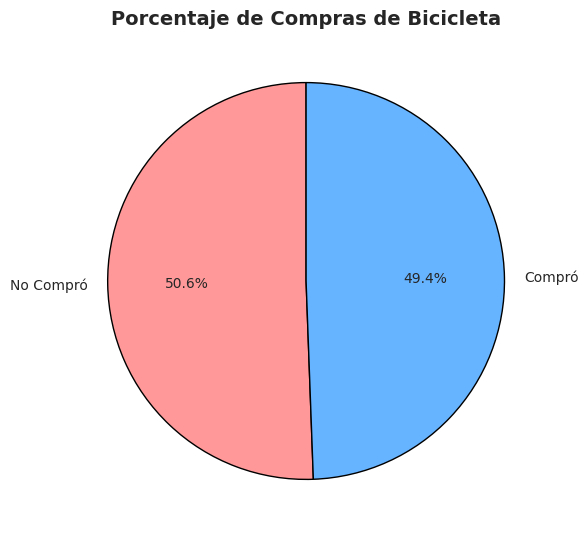

In [ ]:

bike_counts = train_data['BikeBuyer'].value_counts().sort_index()


labels = ['No Compr√≥', 'Compr√≥']
colors = ['#ff9999','#66b3ff']


plt.figure(figsize=(6,6))
plt.pie(bike_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentaje de Compras de Bicicleta', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


# Paso 4: MODELADO

## **Caso 1 : M√°quina de Modelado de Datos (SVM)**

### 1.1 Preparaci√≥n de Datos, Entrenamiento y Evaluaci√≥n

<ipython-input-26-a064f0f88431>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-26-a064f0f88431>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-26-a064f0f88431>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Accuracy: 0.7949688936975926
F1-score: 0.7809248554913295

Reporte de Clasificacion:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81      1884
           1       0.82      0.75      0.78      1813

    accuracy                           0.79      3697
   macro avg       0.80      0.79      0.79      3697
weighted avg       0.80      0.79      0.79      3697



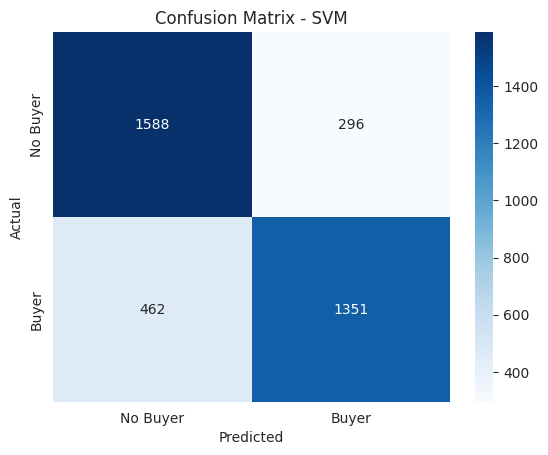

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educaci√≥n secundaria','HouseOwnerFlag',
       'SpanishEducation_Educaci√≥n secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gesti√≥n', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'A√±os_transc_ultima_compra']]

y= df[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['A√±os_transc_ultima_compra']])
X['A√±os_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

# Dividir en train/test (80-20)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)


# Entrenar modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones
y_pred = svm_model.predict(X_test)


# Calcular precisi√≥n
accuracy_SVM = accuracy_score(y_test,y_pred)
precision_metric_SVM = precision_score(y_test, y_pred)
recall_metric_SVM = recall_score(y_test, y_pred)
f1_metric_SVM = f1_score(y_test, y_pred)

# Evaluaci√≥n
print("Accuracy:", accuracy_SVM)
print("F1-score:", f1_metric_SVM )
print("\nReporte de Clasificacion:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Buyer', 'Buyer'], yticklabels=['No Buyer', 'Buyer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()



1. **Accuracy = 79%** : El modelo predice correctamente si una persona comprar√° o no una bicicleta en el 79% de los casos.
2. **F1-score = 78%** : Un F1 de 0.78 indica que el modelo tiene un buen equilibrio no solo acierta o se acerca bastante cuando dice que alguien va a comprar, sino que tambi√©n no se le omiten compradores reales.

 **Matriz de confusi√≥n:**
*   De las 1813 personas que realmente compraron, el modelo acert√≥ con 1351, pero fall√≥ en 462 (las clasific√≥ como no compradores).
*   De las 1884 personas que no compraron, acert√≥ con 1588, pero fall√≥ en 296 (falsos positivos).

*   El modelo predice mejor a los que no compran que a los que s√≠, ya que comete menos errores en esa clase.

### 1.2 Prueba de Datos

## **Caso 2: Aplicaci√≥n de Regresi√≥n Log√≠stica**


### 2.1 Preparaci√≥n de Datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos (asumiendo que ya est√°n preprocesados como en tu muestra)
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educaci√≥n secundaria','HouseOwnerFlag',
       'SpanishEducation_Educaci√≥n secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gesti√≥n', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'A√±os_transc_ultima_compra']]
y= df[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['A√±os_transc_ultima_compra']])
X['A√±os_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

<ipython-input-116-99e9bb2b5333>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-116-99e9bb2b5333>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-116-99e9bb2b5333>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

### 2.2 Entrenamiento del Modelo de Regresi√≥n Log√≠stica:

In [ ]:
# Crear y entrenar el modelo
logreg = LogisticRegression(solver='liblinear',random_state=16)
logreg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::, 1]  # Probabilidades para la clase positiva

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2.3 Evaluaci√≥n del Modelo

=== M√©tricas del modelo de Regresi√≥n Log√≠stica ===
Accuracy: 0.7303
Precision: 0.7556
Recall: 0.6652
F1-score: 0.7075


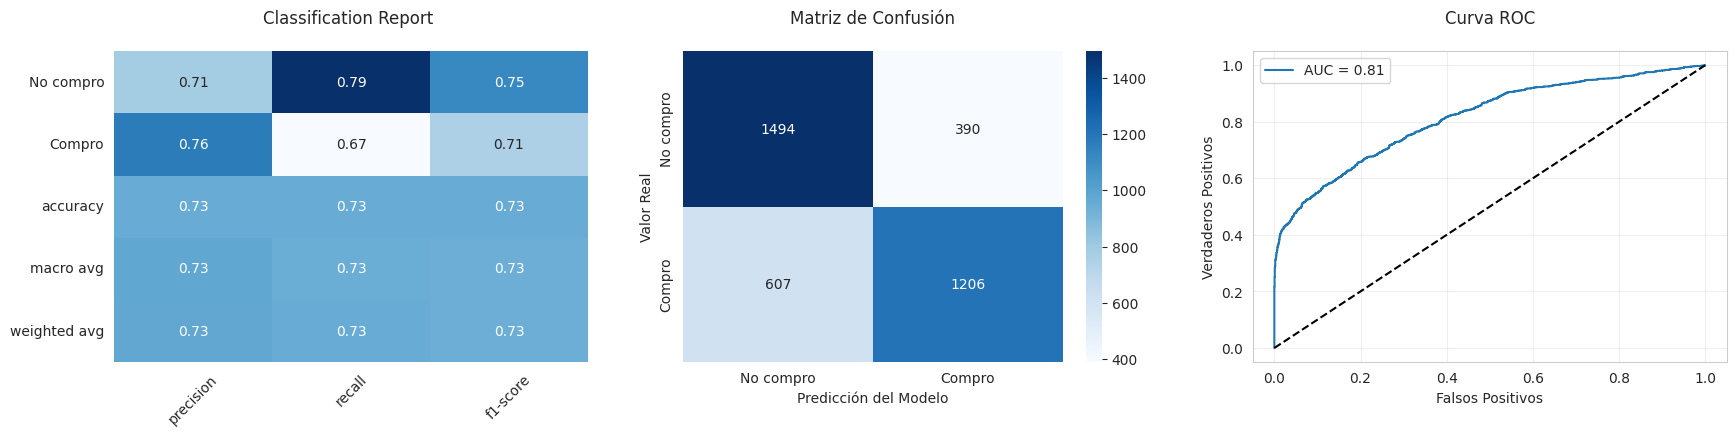

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir nombres de las clases
class_names = ["No compro", "Compro"]  # Cambia esto seg√∫n tus categor√≠as

# Calcular m√©tricas y guardarlas con nombre espec√≠fico para Regresi√≥n Log√≠stica
accuracy_rl = accuracy_score(y_test, y_pred)
precision_rl = precision_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred)
f1_rl = f1_score(y_test, y_pred)

# Mostrar m√©tricas
print("=== M√©tricas del modelo de Regresi√≥n Log√≠stica ===")
print(f"Accuracy: {accuracy_rl:.4f}")
print(f"Precision: {precision_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-score: {f1_rl:.4f}")

# --- Visualizaciones ---
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar figura con 3 subplots
plt.figure(figsize=(18, 5))

# --- Classification Report ---
plt.subplot(1, 3, 1)
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)
plt.title("Classification Report ", pad=20)
plt.xticks(rotation=45)

# --- Matriz de Confusi√≥n ---
plt.subplot(1, 3, 2)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicci√≥n del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n', pad=20)

# --- Curva ROC ---
plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()


### 2.4 Interpretaci√≥n de coeficientes

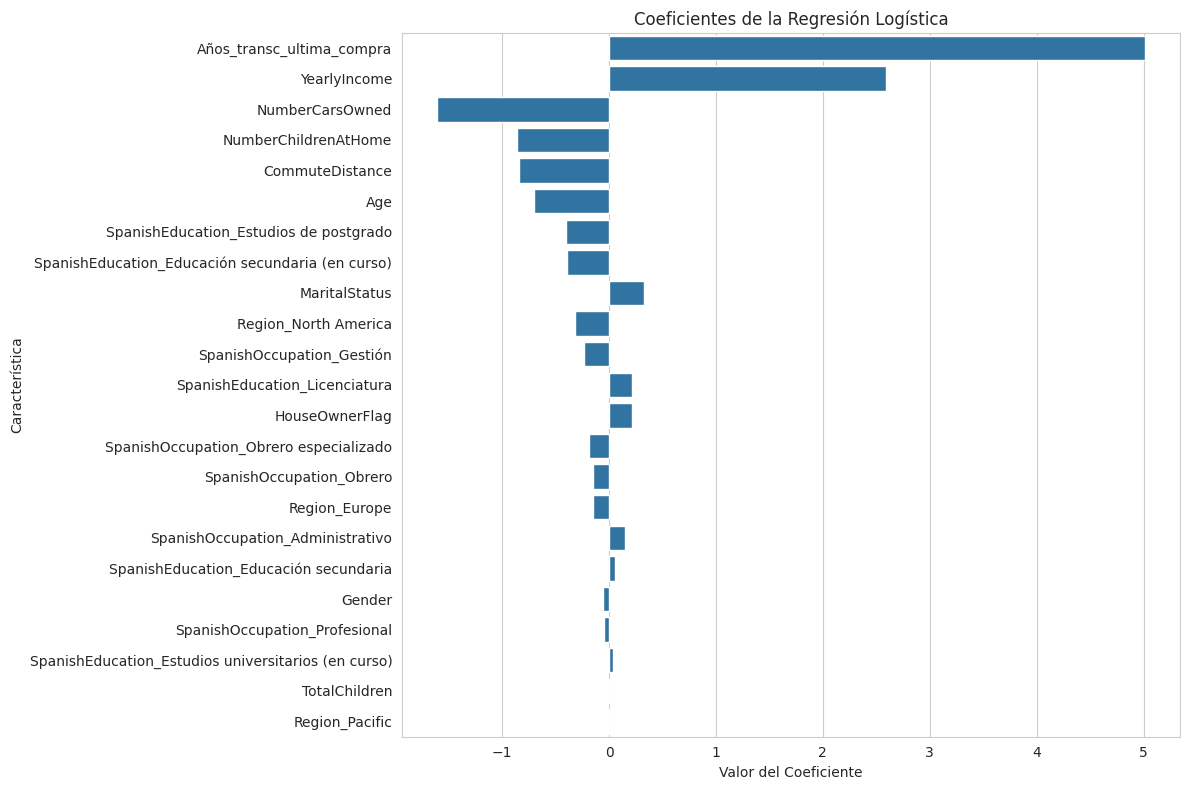


Coeficientes m√°s importantes y su interpretaci√≥n:
                                              Feature  Coefficient  \
22                          A√±os_transc_ultima_compra     5.010155   
2                                        YearlyIncome     2.588326   
4                                     NumberCarsOwned    -1.606026   
6                                NumberChildrenAtHome    -0.863045   
3                                     CommuteDistance    -0.838659   
0                                                 Age    -0.698155   
14             SpanishEducation_Estudios de postgrado    -0.399025   
13   SpanishEducation_Educaci√≥n secundaria (en curso)    -0.392582   
1                                       MaritalStatus     0.322962   
9                                Region_North America    -0.320250   
18                          SpanishOccupation_Gesti√≥n    -0.236513   
16                      SpanishEducation_Licenciatura     0.216850   
12                                

In [ ]:
# Obtener coeficientes y crear DataFrame para an√°lisis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Abs_Coefficient': np.abs(logreg.coef_[0]),
    'Odds_Ratio': np.exp(logreg.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

# Visualizar los coeficientes m√°s importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coeficientes de la Regresi√≥n Log√≠stica')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Caracter√≠stica')
plt.tight_layout()
plt.show()

# Mostrar tabla de coeficientes
print("\nCoeficientes m√°s importantes y su interpretaci√≥n:")
print(coefficients)

## **Caso 3: Aplicaci√≥n de Random Forest**

### 3.1 Importaci√≥n de librer√≠as y carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar datos
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')
df.head()


Age  MaritalStatus  Gender  YearlyIncome  TotalChildren  \
0   38              0       1         90000              2   
1   33              1       1         60000              3   
2   39              0       1         60000              3   
3   36              1       0         70000              0   
4   30              1       0         80000              5   

   NumberChildrenAtHome  HouseOwnerFlag  NumberCarsOwned  car  \
0                     0               1                0    0   
1                     3               0                1    1   
2                     3               1                1    1   
3                     0               0                1    1   
4                     5               1                4    1   

   A√±os_transc_ultima_compra  ...  \
0                         14  ...   
1                         14  ...   
2                         14  ...   
3                         14  ...   
4                         14  ...   

   SpanishEducation_Estudios universitarios (en curso)  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   SpanishEducation_Licenciatura  SpanishOccupation_Administrativo  \
0                            1.0                               0.0   
1                            1.0                               0.0   
2                            1.0                               0.0   
3                            1.0                               0.0   
4                            1.0                               0.0   

   SpanishOccupation_Gesti√≥n  SpanishOccupation_Obrero  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   SpanishOccupation_Obrero especializado  SpanishOccupation_Profesional  \
0                                     0.0                            1.0   
1                                     0.0                            1.0   
2                                     0.0                            1.0   
3                                     0.0                            1.0   
4                                     0.0                            1.0   

   Region_Europe  Region_North America  Region_Pacific  
0            0.0                   0.0             1.0  
1            0.0                   0.0             1.0  
2            0.0                   0.0             1.0  
3            0.0                   0.0             1.0  
4            0.0                   0.0             1.0  

[5 rows x 25 columns]

### 3.2 Preparaci√≥n de los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educaci√≥n secundaria','HouseOwnerFlag',
       'SpanishEducation_Educaci√≥n secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gesti√≥n', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'A√±os_transc_ultima_compra']]
y= df[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['A√±os_transc_ultima_compra']])
X['A√±os_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)


<ipython-input-33-f704c6dd25ba>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-33-f704c6dd25ba>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-33-f704c6dd25ba>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

### 3.3 Entrenamiento del modelo con GridSearchCV

In [ ]:
# Definir el modelo base
rf = RandomForestClassifier(random_state=0)

# Definir la grilla de hiperpar√°metros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# B√∫squeda de hiperpar√°metros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Entrenar con validaci√≥n cruzada
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
best_rf


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_samples_split=5, random_state=0)

### 3.4 Evaluaci√≥n del modelo

‚úÖ Accuracy en TEST: 0.8537
‚úÖ Precision en TEST: 0.8622
‚úÖ Recall en TEST: 0.8351
‚úÖ F1-Score en TEST: 0.8484


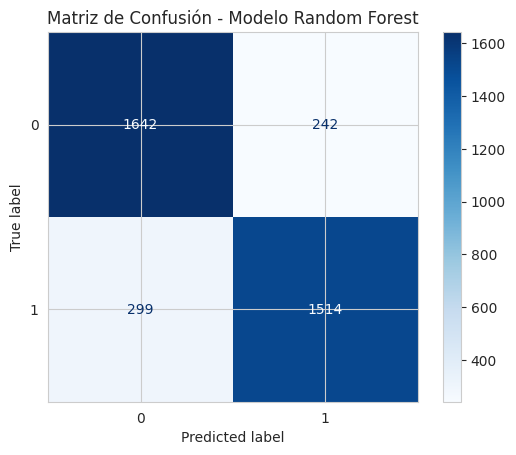


Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1884
           1       0.86      0.84      0.85      1813

    accuracy                           0.85      3697
   macro avg       0.85      0.85      0.85      3697
weighted avg       0.85      0.85      0.85      3697



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predicciones
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Accuracy
test_accuracy_forest  = accuracy_score(y_test, y_test_pred)


print(f"‚úÖ Accuracy en TEST: {test_accuracy_forest :.4f}")

# M√©tricas adicionales

test_precision_forest = precision_score(y_test, y_test_pred)


test_recall_forest = recall_score(y_test, y_test_pred)

test_f1_forest = f1_score(y_test, y_test_pred)

# Mostrar Precision, Recall y F1

print(f"‚úÖ Precision en TEST: {test_precision_forest:.4f}")

print(f"‚úÖ Recall en TEST: {test_recall_forest:.4f}")

print(f"‚úÖ F1-Score en TEST: {test_f1_forest:.4f}")

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_test_pred)

# Mostrar la matriz de confusi√≥n de manera visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusi√≥n - Modelo Random Forest")
plt.show()

# Reporte de clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_test_pred))


### 3.5 Importancia de las caracter√≠sticas

In [ ]:
# Importancia de features
feature_importances_df = pd.DataFrame({
    "feature": X.columns,
    "importance": best_rf.feature_importances_
}).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df.head()


feature  importance
22  A√±os_transc_ultima_compra    0.283679
0                         Age    0.158311
2                YearlyIncome    0.089589
4             NumberCarsOwned    0.071188
3             CommuteDistance    0.068517

### 3.6 Visualizaci√≥n de la importancia de variables

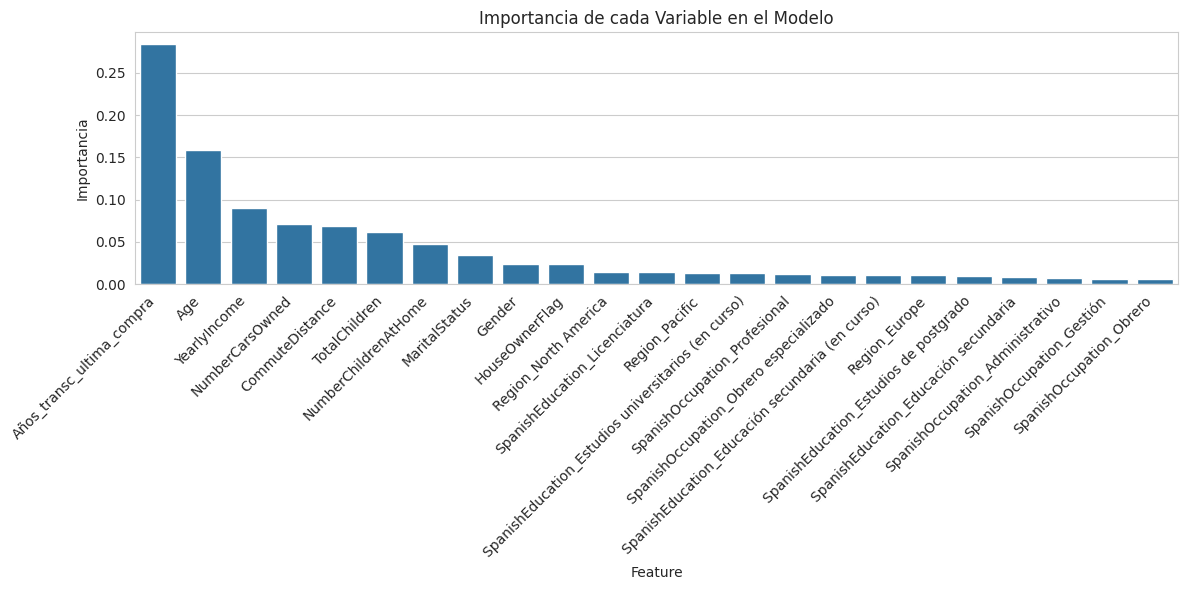

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=feature_importances_df)
plt.xlabel("Feature")
plt.ylabel("Importancia")
plt.title("Importancia de cada Variable en el Modelo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 3.7 Curva ROC   

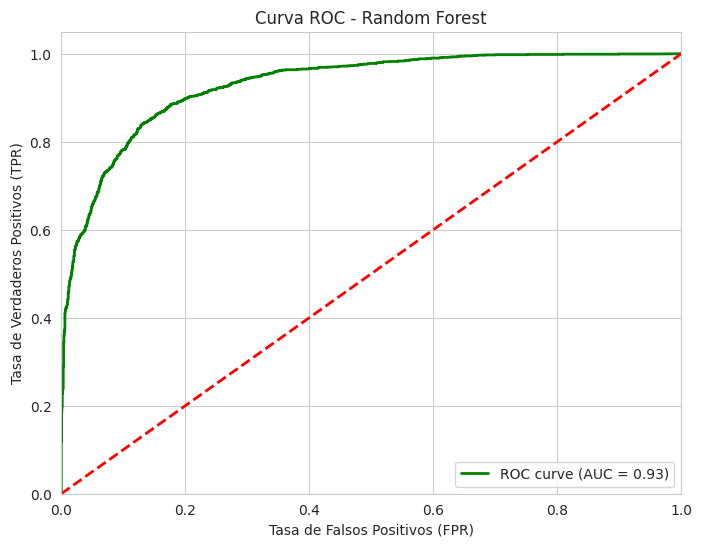

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de la clase positiva (1)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

# Calcular el √°rea bajo la curva (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # L√≠nea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## **Caso 4: Aplicaci√≥n de XGBoost**

### 4.1 Importaci√≥n de librer√≠as y carga de datos

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd  # Para cargar y manipular datos en formato de tabla (DataFrame)
import numpy as np  # Para trabajar con arrays y funciones matem√°ticas
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjunto de entrenamiento y validaci√≥n
from sklearn.preprocessing import StandardScaler  # Para escalar los datos antes de entrenar el modelo
from xgboost import XGBClassifier  # El modelo XGBoost utilizado para clasificaci√≥n
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Para calcular y mostrar las m√©tricas de rendimiento
import matplotlib.pyplot as plt  # Para crear gr√°ficos de visualizaci√≥n
import seaborn as sns  # Para hacer gr√°ficos m√°s atractivos, especialmente la matriz de confusi√≥n

### 4.2 Cargar Datos Preprocesados

In [ ]:
# Cargar datos preprocesados
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')  # Leemos el archivo CSV

### 4.3 Separaci√≥n de Predictores y Variable Objetivo

In [ ]:
# Separar predictores y variable objetivo
X = df.drop(columns=['BikeBuyer'])  # Las caracter√≠sticas de entrada (variables predictoras)
y = df['BikeBuyer']  # La variable objetivo que queremos predecir (si compr√≥ o no)

### 4.4 Dividir el dataset en entrenamiento y Validaci√≥n

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.5 Escalada de Datos

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 4.6 Crear el Modelo XGBoost con los Hiperpar√°metros √≥ptimos

In [ ]:
# Crear el modelo XGBoost con los hiperpar√°metros √≥ptimos
xgb_model = XGBClassifier(
    colsample_bytree=0.7,   # Proporci√≥n de caracter√≠sticas a considerar por cada √°rbol
    gamma=0.1,              # Regularizaci√≥n para controlar la complejidad
    learning_rate=0.1,      # Tasa de aprendizaje
    max_depth=10,           # Profundidad m√°xima de los √°rboles
    min_child_weight=3,     # Peso m√≠nimo de los nodos
    n_estimators=200,       # N√∫mero de √°rboles
    subsample=0.7,          # Fracci√≥n de muestras para cada √°rbol
    random_state=42         # Semilla para la reproducibilidad
)

### 4.7 Entrenar el Modelo y Predecir sobre el Conjunto de Validaci√≥n

In [ ]:
# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)
# Predecir sobre el conjunto de validaci√≥n
y_pred = xgb_model.predict(X_val_scaled)

### 4.8 M√©tricas de Rendimiento

In [ ]:
# M√©tricas de rendimiento
accuracy_xgboost = accuracy_score(y_val, y_pred)
precision_xgboost = precision_score(y_val, y_pred)
recall_xgboost = recall_score(y_val, y_pred)
f1_xgboost = f1_score(y_val, y_pred)

# Mostrar resultados
print(f"üìä Accuracy: {accuracy_xgboost * 100:.2f}%")
print(f"Precisi√≥n (Precision): {precision_xgboost:.2f}")
print(f"Sensibilidad (Recall): {recall_xgboost:.2f}")
print(f"F1-Score: {f1_xgboost:.2f}")

üìä Accuracy: 85.31%
Precisi√≥n (Precision): 0.86
Sensibilidad (Recall): 0.84
F1-Score: 0.85


### 4.9 Calcular y Visualizar la Matriz de Confusi√≥n

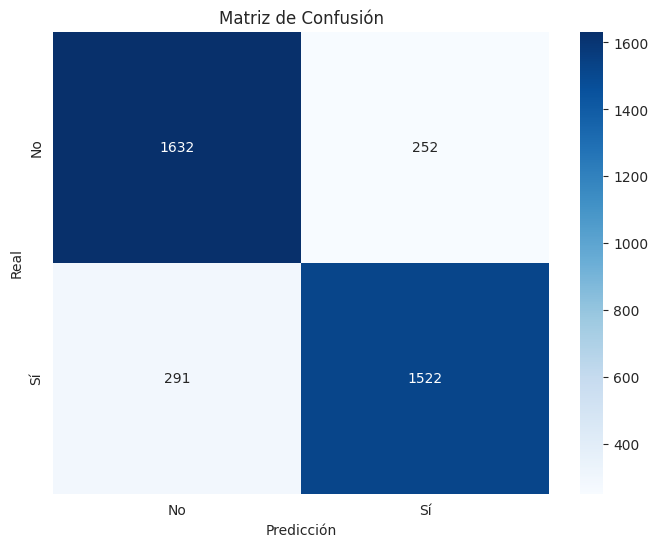

In [ ]:
# Calcular la matriz de confusi√≥n
cm = confusion_matrix(y_val, y_pred)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'S√≠'], yticklabels=['No', 'S√≠'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

### 4.10 Curva ROC y AUC

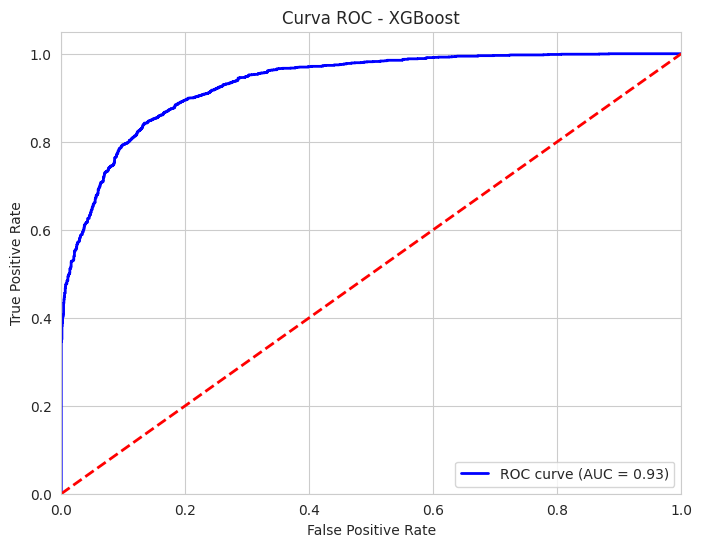

In [ ]:
from sklearn.metrics import roc_curve, auc


# Calcular las probabilidades para la clase positiva (1)


y_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]  # Probabilidades para la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Calcular el AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # L√≠nea diagonal (referencia)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

## **Caso 5: Aplicaci√≥n de KNN**

### 5.1 Importaci√≥n de Bibliotecas Necesarias

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

### 5.2 Carga de Datos Preprocesados

In [ ]:
# Cargar datos preprocesados
df = pd.read_csv('Ejercicio_Aplicacion_SEMMA_preprocesado2.csv')

### 5.3 Separaci√≥n de Predictores y Variable Objetivo

In [ ]:
# Separar predictores y variable objetivo
X = df.drop(columns=['BikeBuyer'])  # 'BikeBuyer' es la variable objetivo
y = df['BikeBuyer']  # Variable objetivo

### 5.4 Dividir el Dataset en Entrenamiento y Validaci√≥n

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de validaci√≥n
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.5 Escalado de Datos

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 5.6 Definir el Modelo KNN y entrenar el Modelo

In [ ]:
# Definir el modelo KNN con los hiperpar√°metros elegidos
knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights='distance')
# Entrenar el modelo
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

### 5.7 Predicciones sobre el Conjunto de Validaci√≥n

In [ ]:
# Predecir sobre el conjunto de validaci√≥n
y_pred = knn.predict(X_val_scaled)
y_proba = knn.predict_proba(X_val_scaled)[:, 1]  # Probabilidades para la curva ROC

### 5.8 C√°lculo de M√©tricas de Rendimiento

In [ ]:
# M√©tricas de rendimiento
accuracy_knn = accuracy_score(y_val, y_pred)
precision_knn = precision_score(y_val, y_pred)
recall_knn = recall_score(y_val, y_pred)
f1_knn = f1_score(y_val, y_pred)

# Mostrar resultados
print(f"üìä Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Precisi√≥n (Precision): {precision_knn:.2f}")
print(f"Sensibilidad (Recall): {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")

üìä Accuracy: 81.99%
Precisi√≥n (Precision): 0.84
Sensibilidad (Recall): 0.78
F1-Score: 0.81


### 5.9 Matriz de Confusi√≥n

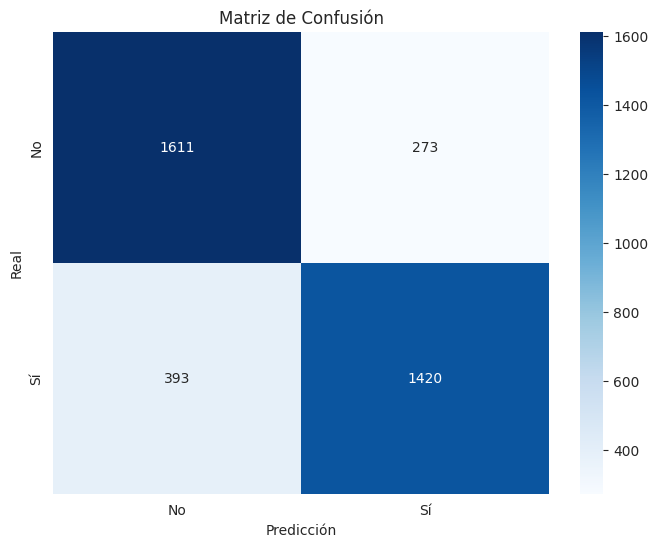

In [ ]:
# Calcular la matriz de confusi√≥n
cm = confusion_matrix(y_val, y_pred)

# Matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'S√≠'], yticklabels=['No', 'S√≠'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

### 5.10 Curva ROC y AUC

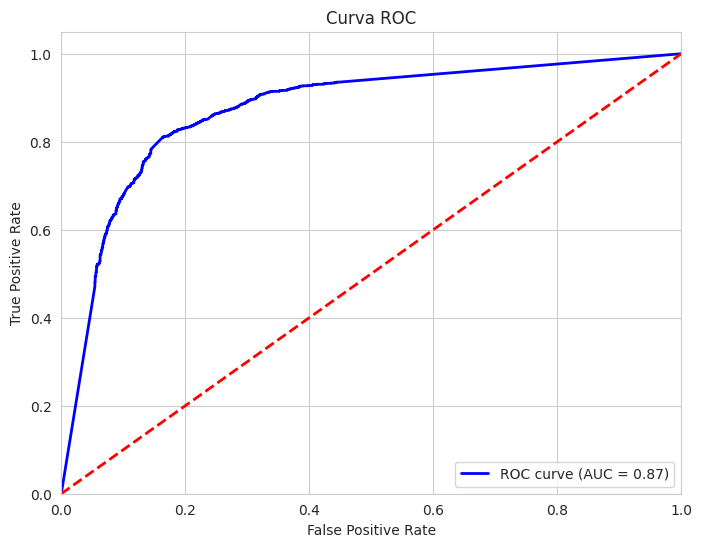

In [ ]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## **Caso 6 Redes Neuronales (RNN)**

In [ ]:
import pandas as pd

df_consolidado= pd.read_csv("Ejercicio_Aplicacion_SEMMA_preprocesado2.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X= df_consolidado[['Age','MaritalStatus','YearlyIncome','CommuteDistance','NumberCarsOwned','TotalChildren','NumberChildrenAtHome','Gender', 'Region_Europe',
       'Region_North America', 'Region_Pacific','SpanishEducation_Educaci√≥n secundaria','HouseOwnerFlag','car',
       'SpanishEducation_Educaci√≥n secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'SpanishOccupation_Administrativo',
       'SpanishOccupation_Gesti√≥n', 'SpanishOccupation_Obrero',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional', 'A√±os_transc_ultima_compra']]
y= df_consolidado[['BikeBuyer']]

model=MinMaxScaler()
scaled_data2= model.fit_transform(X[['Age']])
X['Age']=scaled_data2


scaled_data= model.fit_transform(X[['YearlyIncome']])
X['YearlyIncome']=scaled_data

scaled_data6= model.fit_transform(X[['CommuteDistance']])
X['CommuteDistance']=scaled_data6


scaled_data3= model.fit_transform(X[['TotalChildren']])
X['TotalChildren']=scaled_data3

scaled_data4= model.fit_transform(X[['NumberChildrenAtHome']])
X['NumberChildrenAtHome']=scaled_data4

scaled_data7= model.fit_transform(X[['A√±os_transc_ultima_compra']])
X['A√±os_transc_ultima_compra']=scaled_data7

scaled_data8= model.fit_transform(X[['NumberCarsOwned']])
X['NumberCarsOwned']=scaled_data8

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

<ipython-input-66-a82dc4c4012c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=scaled_data2
<ipython-input-66-a82dc4c4012c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearlyIncome']=scaled_data
<ipython-input-66-a82dc4c4012c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

model=Sequential([
    Dense(143,activation='relu', input_shape=[X_train.shape[1]]),
    Dense(155, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

optimizador= optimizers.Adam(learning_rate=0.0035)


model.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
370/370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 5ms/step - accuracy: 0.7127 - loss: 0.5422 - val_accuracy: 0.7694 - val_loss: 0.4596
Epoch 2/100
370/370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.7675 - loss: 0.4615 - val_accuracy: 0.7836 - val_loss: 0.4324
Epoch 3/100
370/370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.7812 - loss: 0.4334 - val_accuracy: 0.7928 - val_loss: 0.4253
Epoch 4/100
370/370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.7916 - loss: 0.4254 - val_accuracy: 0.7951 - val_loss: 0.4242
Epoch 5/100
370/370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4137 - val_accuracy: 0.7934 - val_loss: 0.4218
Epoch 6/100
370/370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8027 - loss: 0.3987 - val_accuracy: 0.8005 - val

In [ ]:
# Hacer predicciones (esto devuelve probabilidades)
predicciones_prob = model.predict(X_test)

# Convertir probabilidades a 0 o 1 (umbral de 0.5 para clasificar)
predicciones_clase = (predicciones_prob >= 0.5).astype(int)
# A√±adir las predicciones al DataFrame (como una nueva columna)
Ejemplos = X_test.copy()  # Hacemos una copia del DataFrame original
Ejemplos['prediccion'] = predicciones_clase  # Agregar predicci√≥n correctamente
Ejemplos

116/116 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step


Age  MaritalStatus  YearlyIncome  CommuteDistance  \
2534   0.281690              0        0.1250         0.000000   
7324   0.042254              1        0.1875         0.000000   
1157   0.661972              0        0.6875         0.250000   
2812   0.253521              1        0.1250         0.000000   
4936   0.676056              0        0.5000         0.583333   
...         ...            ...           ...              ...   
3023   0.070423              1        0.1250         0.583333   
5418   0.169014              1        0.0000         0.000000   
15947  0.140845              1        0.0625         0.250000   
16360  0.140845              0        0.4375         1.000000   
10660  0.253521              0        0.3125         0.250000   

       NumberCarsOwned  TotalChildren  NumberChildrenAtHome  Gender  \
2534              0.00            0.6                   0.0       0   
7324              0.50            0.0                   0.0       1   
1157              0.25            0.2                   0.6       1   
2812              0.50            0.4                   0.4       0   
4936              0.25            0.8                   0.0       0   
...                ...            ...                   ...     ...   
3023              0.50            0.0                   0.0       0   
5418              0.50            0.6                   0.4       0   
15947             0.25            0.0                   0.0       0   
16360             1.00            0.0                   0.0       1   
10660             0.00            0.6                   0.4       0   

       Region_Europe  Region_North America  ...  \
2534             1.0                   0.0  ...   
7324             0.0                   1.0  ...   
1157             0.0                   1.0  ...   
2812             1.0                   0.0  ...   
4936             0.0                   1.0  ...   
...              ...                   ...  ...   
3023             0.0                   1.0  ...   
5418             1.0                   0.0  ...   
15947            1.0                   0.0  ...   
16360            0.0                   0.0  ...   
10660            0.0                   1.0  ...   

       SpanishEducation_Estudios de postgrado  \
2534                                      1.0   
7324                                      0.0   
1157                                      1.0   
2812                                      0.0   
4936                                      0.0   
...                                       ...   
3023                                      0.0   
5418                                      0.0   
15947                                     0.0   
16360                                     0.0   
10660                                     1.0   

       SpanishEducation_Estudios universitarios (en curso)  \
2534                                                 0.0     
7324                                                 0.0     
1157                                                 0.0     
2812                                                 1.0     
4936                                                 0.0     
...                                                  ...     
3023                                                 0.0     
5418                                                 0.0     
15947                                                1.0     
16360                                                0.0     
10660                                                0.0     

       SpanishEducation_Licenciatura  SpanishOccupation_Administrativo  \
2534                             0.0                               1.0   
7324                             0.0                               0.0   
1157                             0.0                               0.0   
2812                             0.0                               1.0   
4936                             1.0                         

In [ ]:
Ejemplos['Clase Real']=y_test
Ejemplos

Age  MaritalStatus  YearlyIncome  CommuteDistance  \
2534   0.281690              0        0.1250         0.000000   
7324   0.042254              1        0.1875         0.000000   
1157   0.661972              0        0.6875         0.250000   
2812   0.253521              1        0.1250         0.000000   
4936   0.676056              0        0.5000         0.583333   
...         ...            ...           ...              ...   
3023   0.070423              1        0.1250         0.583333   
5418   0.169014              1        0.0000         0.000000   
15947  0.140845              1        0.0625         0.250000   
16360  0.140845              0        0.4375         1.000000   
10660  0.253521              0        0.3125         0.250000   

       NumberCarsOwned  TotalChildren  NumberChildrenAtHome  Gender  \
2534              0.00            0.6                   0.0       0   
7324              0.50            0.0                   0.0       1   
1157              0.25            0.2                   0.6       1   
2812              0.50            0.4                   0.4       0   
4936              0.25            0.8                   0.0       0   
...                ...            ...                   ...     ...   
3023              0.50            0.0                   0.0       0   
5418              0.50            0.6                   0.4       0   
15947             0.25            0.0                   0.0       0   
16360             1.00            0.0                   0.0       1   
10660             0.00            0.6                   0.4       0   

       Region_Europe  Region_North America  ...  \
2534             1.0                   0.0  ...   
7324             0.0                   1.0  ...   
1157             0.0                   1.0  ...   
2812             1.0                   0.0  ...   
4936             0.0                   1.0  ...   
...              ...                   ...  ...   
3023             0.0                   1.0  ...   
5418             1.0                   0.0  ...   
15947            1.0                   0.0  ...   
16360            0.0                   0.0  ...   
10660            0.0                   1.0  ...   

       SpanishEducation_Estudios universitarios (en curso)  \
2534                                                 0.0     
7324                                                 0.0     
1157                                                 0.0     
2812                                                 1.0     
4936                                                 0.0     
...                                                  ...     
3023                                                 0.0     
5418                                                 0.0     
15947                                                1.0     
16360                                                0.0     
10660                                                0.0     

       SpanishEducation_Licenciatura  SpanishOccupation_Administrativo  \
2534                             0.0                               1.0   
7324                             0.0                               0.0   
1157                             0.0                               0.0   
2812                             0.0                               1.0   
4936                             1.0                               0.0   
...                              ...                               ...   
3023                             0.0                               0.0   
5418                             0.0                               0.0   
15947                            0.0                               0.0   
16360                            1.0                               0.0   
10660                            0.0                               0.0   

       SpanishOccupation_Gesti√≥n  SpanishOccupation_Obrero  \
2534                         0.0                       0.0   
7324  

In [ ]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score

# Calcular precisi√≥n
precision_RNN = accuracy_score(y_test, predicciones_clase)
precision_metric_RNN = precision_score(y_test, predicciones_clase)
recall_metric_RNN = recall_score(y_test, predicciones_clase)
f1_metric_RNN = f1_score(y_test, predicciones_clase)

print(f'Precisi√≥n del modelo(Accuracy): {precision_RNN * 100:.2f}%')
print(f'Precisi√≥n (Precision): {precision_metric_RNN:.2f}')
print(f'Sensibilidad (Recall): {recall_metric_RNN:.2f}')
print(f'F1-Score: {f1_metric_RNN :.2f}')

Precisi√≥n del modelo(Accuracy): 82.45%
Precisi√≥n (Precision): 0.83
Sensibilidad (Recall): 0.80
F1-Score: 0.82


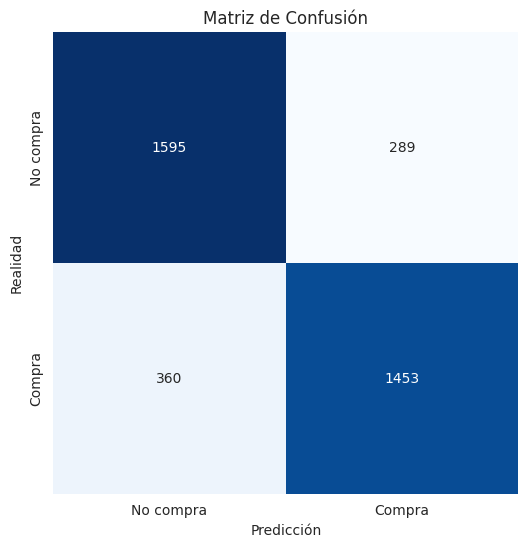

Matriz de Confusi√≥n:
[[1595  289]
 [ 360 1453]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, predicciones_clase)

# Mostrar la matriz de confusi√≥n con un mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No compra', 'Compra'], yticklabels=['No compra', 'Compra'])
plt.title('Matriz de Confusi√≥n')
plt.xlabel('Predicci√≥n')
plt.ylabel('Realidad')
plt.show()

# Mostrar la matriz de confusi√≥n en formato num√©rico
print("Matriz de Confusi√≥n:")
print(conf_matrix)

116/116 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step


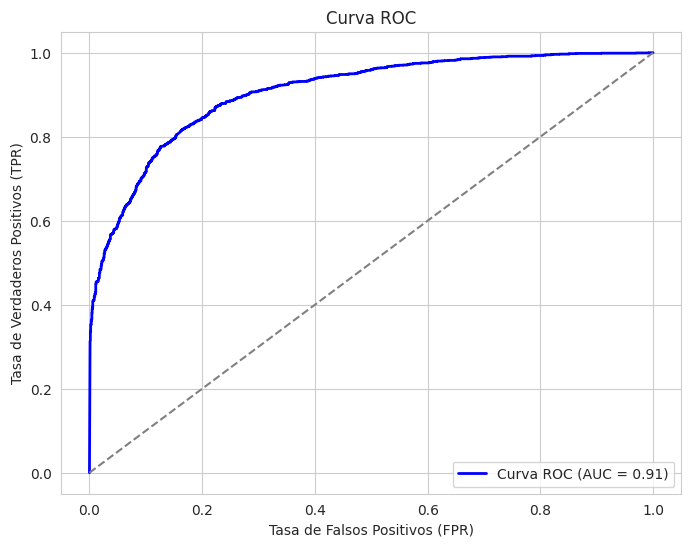

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
# Calcular la matriz de confusi√≥n
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Calcular las probabilidades de las predicciones (en vez de 0 o 1)
predicciones_prob = model.predict(X_test)  # Usamos las probabilidades, no las clases

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predicciones_prob)  # Calcula los FPR y TPR
roc_auc = auc(fpr, tpr)  # √Årea bajo la curva

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # L√≠nea diagonal (no discriminativa)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

# 5. EVALUACI√ìN

## 5.1 Extraemos las metricas de los 6 modelos

In [ ]:
# Crear el diccionario con m√©tricas
model_metrics = {
    "Modelo": ["SVM", "Regresi√≥n Log√≠stica", "Random Forest", "XGBoost", "KNN", "Red Neuronal"],
    "Accuracy": [accuracy_SVM, accuracy_rl, test_accuracy_forest, accuracy_xgboost, accuracy_knn, precision_RNN],
    "Precision": [precision_metric_SVM, precision_rl, test_precision_forest, precision_xgboost, precision_knn, precision_metric_RNN],
    "Recall": [recall_metric_SVM, recall_rl, test_recall_forest, recall_xgboost, recall_knn, recall_metric_RNN],
    "F1-Score": [f1_metric_SVM, f1_rl, test_f1_forest, f1_xgboost, f1_knn, f1_metric_RNN]
}

# Crear DataFrame
df_modelos = pd.DataFrame(model_metrics)

# Mostrar tabla
print("üìã Comparativa de Modelos de Clasificaci√≥n:")
df_modelos

üìã Comparativa de Modelos de Clasificaci√≥n:


Modelo  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.794969   0.820279  0.745174  0.780925
1  Regresi√≥n Log√≠stica  0.730322   0.755639  0.665196  0.707539
2        Random Forest  0.853665   0.862187  0.835080  0.848417
3              XGBoost  0.853124   0.857948  0.839493  0.848620
4                  KNN  0.819854   0.838748  0.783232  0.810040
5         Red Neuronal  0.824452   0.834099  0.801434  0.817440

## 5.2 Grafica Comparativa

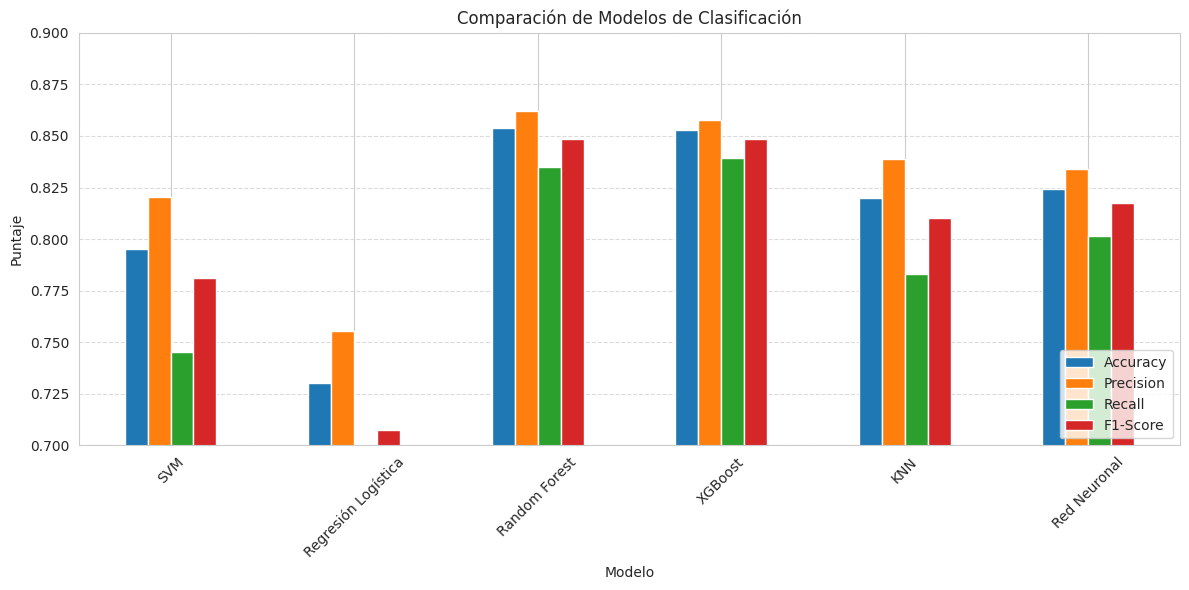

In [ ]:
# Gr√°fico
df_modelos.set_index("Modelo")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Comparaci√≥n de Modelos de Clasificaci√≥n")
plt.ylabel("Puntaje")
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 5.3 Consideraciones de Implementaci√≥n para el Modelo de Clasificaci√≥n

Antes de implementar el modelo entrenado en un entorno del mundo real, es fundamental tener en cuenta los siguientes aspectos clave:

üîÅ **Frecuencia de actualizaci√≥n del modelo:**  
Los datos pueden evolucionar con el tiempo. Por eso, es posible que el modelo de clasificaci√≥n necesite ser reentrenado peri√≥dicamente para mantener su rendimiento, especialmente si se detectan cambios en los patrones de comportamiento de los usuarios o clientes.

üìâ **Monitoreo del desempe√±o:**  
Es crucial implementar un sistema de monitoreo que permita evaluar el rendimiento del modelo en producci√≥n. Se deben seguir m√©tricas como la precisi√≥n, recall o F1-score en tiempo real, con alertas ante cualquier ca√≠da significativa.

üß† **Explicabilidad del modelo:**  
Aunque modelos como Random Forest ofrecen un buen rendimiento, puede ser importante explicar por qu√© se clasific√≥ a un usuario como "comprador" o "no comprador". Esto es √∫til para generar confianza en los usuarios finales y para cumplir requisitos normativos. Se pueden usar herramientas como SHAP o LIME para mejorar la interpretabilidad.

‚öôÔ∏è **Escalabilidad:**  
La infraestructura debe ser capaz de manejar la carga de predicciones necesarias, especialmente si se integra el modelo en un sistema en l√≠nea que reciba muchas solicitudes simult√°neas.

üîö **Finalizaci√≥n del proceso SEMMA:**  
Con la evaluaci√≥n completa y la elecci√≥n del mejor modelo de clasificaci√≥n (en este caso, **Random Forest**), se cierra el ciclo SEMMA. El modelo ya est√° listo para su implementaci√≥n en producci√≥n, acompa√±ado de todas las medidas necesarias para garantizar su fiabilidad y utilidad a largo plazo.


##  5.4 Fase ASSESS ‚Äì Evaluaci√≥n del modelo como tal

En esta etapa del proceso SEMMA, se eval√∫a el rendimiento de los modelos aplicados utilizando m√©tricas de clasificaci√≥n como:

- **Accuracy** (precisi√≥n general del modelo)
- **Precision** (proporci√≥n de verdaderos positivos entre todos los predichos como positivos)
- **Recall** (capacidad del modelo para encontrar todos los casos positivos)
- **F1-Score** (media arm√≥nica entre precisi√≥n y recall)

Se compararon seis modelos: SVM, Regresi√≥n Log√≠stica, Random Forest, XGBoost, KNN y Red Neuronal.  
A continuaci√≥n, se presentan los resultados:

## üìä Comparativa de Modelos de Clasificaci√≥n

| Modelo               | Accuracy | Precision | Recall  | F1-Score |
|----------------------|----------|-----------|---------|----------|
| SVM                  | 0.794989 | 0.820279  | 0.745174| 0.780925 |
| Regresi√≥n Log√≠stica  | 0.730322	| 0.755639	| 0.665196| 0.707539 |
| Random Forest        | 0.853665 | 0.862187  | 0.835080| 0.848417 |
| XGBoost              | 0.853124 | 0.857948  | 0.839493| 0.848620 |
| KNN                  | 0.819854 | 0.838748  | 0.783232| 0.810040 |
| Red Neuronal         | 0.824452 | 0.834099  | 0.801434| 0.817440 |

**‚úÖ Conclusi√≥n**: El modelo **Random Forest** obtuvo los mejores resultados en *todas* las m√©tricas clave y m√°s respecto al Accuracy con un valor de 85.36 % y una curva ROC (AUC) de 0.93 representa la probabilidad de que el modelo, si se da un ejemplo positivo y negativo elegido al azar, por lo que fue seleccionado como modelo final,
siendo muy ligeramente superior al XGBoost , aunque ambos modelos serian los mas indicados para este contexto

Adem√°s, se visualiz√≥ la **matriz de confusi√≥n** y el **reporte de clasificaci√≥n**, los cuales confirmaron la capacidad del modelo para predecir con alta precisi√≥n tanto positivos como negativos.


# Guardamos el modelo

In [ ]:
## Guardamos el mejor modelo encontrado

In [ ]:
import joblib

# Guardar el mejor modelo entrenado
joblib.dump(best_rf, "modelo_random_forest_final.pkl")

print("‚úÖ Modelo Random Forest guardado correctamente.")


‚úÖ Modelo Random Forest guardado correctamente.
